
## Modeling - Sequential with 10 Categories
- Image Generator from Keras
- Uses flow from directory to tackle memory issues. It overcomes these issues as it carries out pre-processing on each image from the directory as it trains or validates the model. It and doesn't save the pre-processed image into a matrix.  
  
### Approach:
    1. Selected the top 10 classes with highest number of samples
    2. Balanced the top 10 classes 
    3. Used Image Generator to carry out additional pre-processing steps
    4. Modeling: Checked accuracies with different Pre-processing steps and 2 Sequential models
       - Model 1: Accuracy 34.1%, Top 3 63.35%
       - Model 2: Accuracy 34.7%, Top 3 63.9%
       - Model 3: Accuracy 10%, Top 3 100%
       - Model 4: Accuracy 36.9%, Top 3 66.9%
           


In [1]:
! pip install theano

In [1]:
import pandas as pd

In [2]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
#import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import keras.backend as K

In [4]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 3)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import ipywidgets as widgets # Loads the Widget framework.
from IPython.core.magics.namespace import NamespaceMagics # Used to query namespace.

# For this example, hide these names, just to avoid polluting the namespace further
get_ipython().user_ns_hidden['widgets'] = widgets
get_ipython().user_ns_hidden['NamespaceMagics'] = NamespaceMagics

In [7]:
class VariableInspectorWindow(object):
    instance = None

    def __init__(self, ipython):
        """Public constructor."""
        if VariableInspectorWindow.instance is not None:
            raise Exception("""Only one instance of the Variable Inspector can exist at a
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.""")

        VariableInspectorWindow.instance = self
        self.closed = False
        self.namespace = NamespaceMagics()
        self.namespace.shell = ipython.kernel.shell

        self._box = widgets.Box()
        self._box.layout.overflow_y = 'scroll'
        self._table = widgets.HTML(value = 'Not hooked')
        self._box.children = [self._table]

        self._ipython = ipython
        self._ipython.events.register('post_run_cell', self._fill)

    def close(self):
        """Close and remove hooks."""
        if not self.closed:
            self._ipython.events.unregister('post_run_cell', self._fill)
            self._box.close()
            self.closed = True
            VariableInspectorWindow.instance = None

    def _fill(self):
        """Fill self with variable information."""
        values = self.namespace.who_ls()
        self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon"><table><thead><tr><th>Name</th><th>Type</th><th>Value</th></tr></thead><tr><td>' + \
            '</td></tr><tr><td>'.join(['{0}</td><td>{1}</td><td>{2}'.format(v, type(eval(v)).__name__, str(eval(v))) for v in values]) + \
            '</td></tr></table></div>'

    def _ipython_display_(self):
        """Called when display() or pyout is used to display the Variable
        Inspector."""
        self._box._ipython_display_()

In [8]:
inspector = VariableInspectorWindow(get_ipython())
inspector

Box(children=(HTML(value='Not hooked'),), layout=Layout(overflow_y='scroll'))

In [9]:
import pickle 

In [10]:
from PIL import Image, ImageChops

In [24]:
Cat_data = pd.read_csv('/home/ubuntu/data/Anno/category_img.csv', sep=",")

In [25]:
Cat_data

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3


In [26]:
Cat_name = pd.read_csv('/home/ubuntu/data/Anno/category_cloth.csv', sep=",") # Add Category names and types using dictionaries

In [27]:
Cat_name

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


In [28]:
dict_Cat = Cat_name.set_index('category_label').T.to_dict('list')

In [29]:
dict_Cat

{1: ['Anorak', 1],
 2: ['Blazer', 1],
 3: ['Blouse', 1],
 4: ['Bomber', 1],
 5: ['Button-Down', 1],
 6: ['Cardigan', 1],
 7: ['Flannel', 1],
 8: ['Halter', 1],
 9: ['Henley', 1],
 10: ['Hoodie', 1],
 11: ['Jacket', 1],
 12: ['Jersey', 1],
 13: ['Parka', 1],
 14: ['Peacoat', 1],
 15: ['Poncho', 1],
 16: ['Sweater', 1],
 17: ['Tank', 1],
 18: ['Tee', 1],
 19: ['Top', 1],
 20: ['Turtleneck', 1],
 21: ['Capris', 2],
 22: ['Chinos', 2],
 23: ['Culottes', 2],
 24: ['Cutoffs', 2],
 25: ['Gauchos', 2],
 26: ['Jeans', 2],
 27: ['Jeggings', 2],
 28: ['Jodhpurs', 2],
 29: ['Joggers', 2],
 30: ['Leggings', 2],
 31: ['Sarong', 2],
 32: ['Shorts', 2],
 33: ['Skirt', 2],
 34: ['Sweatpants', 2],
 35: ['Sweatshorts', 2],
 36: ['Trunks', 2],
 37: ['Caftan', 3],
 38: ['Cape', 3],
 39: ['Coat', 3],
 40: ['Coverup', 3],
 41: ['Dress', 3],
 42: ['Jumpsuit', 3],
 43: ['Kaftan', 3],
 44: ['Kimono', 3],
 45: ['Nightdress', 3],
 46: ['Onesie', 3],
 47: ['Robe', 3],
 48: ['Romper', 3],
 49: ['Shirtdress', 3],
 5

In [30]:
Cat_data.columns

Index(['image_name', 'category_label'], dtype='object')


# ---> Start Running from here incase instance restarted

In [31]:
with open("../data/Full_df.pkl", 'rb') as picklefile: 
    Full_df = pickle.load(picklefile)

In [32]:
Full_df.head(5)

,image_name,category_label,category_name,category_type,Process_Files
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...


#### Check category type & counts

Categories ---> 1 to 48

In [33]:
Full_df[Full_df['category_label']==48].category_name.unique()

array(['Romper'], dtype=object)

In [34]:
Full_df[Full_df['category_label']==41].category_name.count()

72158

## Classes are imbalanced


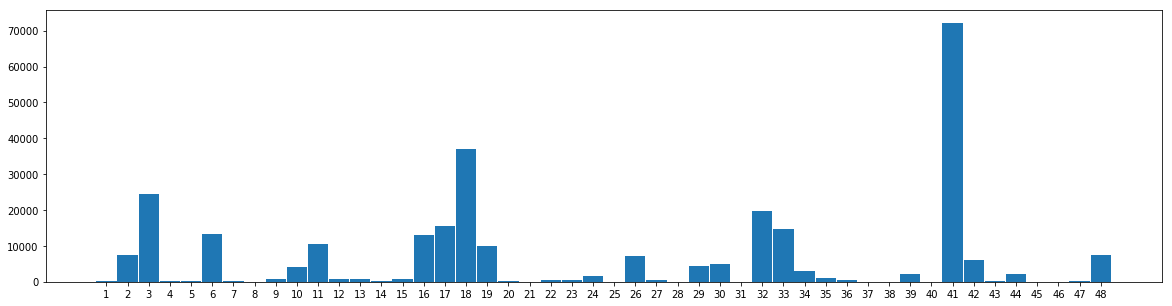

In [35]:
hist, bins = np.histogram(Full_df['category_label'], bins=48)
plt.figure(figsize=(20,5))
width = .98 * (bins[1] - bins[0])
plt.bar(np.arange(1,49), hist, align='center', width=width)
plt.xticks(np.arange(1,49))
plt.show()

Analysis:  
Select 20 categories that have over 2000 examples:  
Categories that are oversampled:    
Categor Name & Label    
Dress - 41
Tee -18
Blouse - 3
Shorts - 32
Tank -17
Skirt - 33
Cardigan - 6
Sweater - 16
Jacket - 11
Top - 19
Blazer -2 
Romper -48
Jeans -26
Jumpsuit -42
Leggings -30
Joggers - 29
Hoodie - 10
Sweatpants -34
Kimono -44
Coat - 39


#### Category Search

In [36]:
Cat_name.iloc[43,:]

category_name     Kimono
category_type          3
category_label        44
Name: 43, dtype: object

Sample Sizes for each Category

In [37]:
Full_df.groupby(['category_label','category_name']).count().sort_values(by=['category_type'],ascending=False)

,,image_name,category_type,Process_Files
category_label,category_name,,,
41,Dress,72158,72158,72158
18,Tee,36887,36887,36887
3,Blouse,24557,24557,24557
32,Shorts,19666,19666,19666
17,Tank,15429,15429,15429
33,Skirt,14773,14773,14773
6,Cardigan,13311,13311,13311
16,Sweater,13123,13123,13123
11,Jacket,10467,10467,10467


In [38]:
Full_df.category_label.value_counts()

41    72158
18    36887
3     24557
32    19666
17    15429
33    14773
6     13311
16    13123
11    10467
19    10078
2      7495
48     7408
26     7076
42     6153
30     5013
29     4416
10     4048
34     3048
44     2294
39     2120
      ...  
27      594
22      527
23      486
36      386
5       330
7       324
4       309
1       160
47      150
20      146
43      126
14       97
21       77
46       70
37       54
25       49
28       45
31       32
8        17
40       17
Name: category_label, Length: 46, dtype: int64

In [39]:
Cat_name

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


## Creating a DataFrame with Balanced Classes

In [40]:
from sklearn.utils import resample

In [41]:
#### Creating an empty DF with only 2rows of data....this DF will be concatenated with balanced classes from each class
Df_Bal = Full_df.iloc[:2,:]

In [42]:
Df_Bal

,image_name,category_label,category_name,category_type,Process_Files
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...


In [43]:
Full_df.category_label.value_counts().median()

769.5

In [44]:
Full_df.category_label.unique()

array([ 3,  2,  5,  4,  1, 18, 17, 19, 16,  7, 10,  6, 11,  9, 15, 12, 20,
       13, 14,  8, 33, 32, 26, 29, 34, 27, 24, 35, 30, 23, 22, 36, 31, 25,
       28, 21, 41, 48, 39, 44, 42, 47, 37, 43, 40, 46])

In [45]:
# if sample less than 1000  then drop class
# if sample less than 2000  then upsample with replacement else downnsample without replacement

for i in Full_df.category_label.unique():
    class_size=Full_df.loc[(Full_df['category_label']== i)].category_label.count()
    #print(i,class_size)
    if  class_size < 2000 & class_size >= 1000:
        DF_i = resample(Full_df.loc[(Full_df['category_label']== i)],replace=True, n_samples=2000, random_state=42)
        #print(len(DF_i))   
        Df_Bal = pd.concat([Df_Bal, DF_i])
    if class_size > 2000:
        DF_i = resample(Full_df.loc[(Full_df['category_label']== i)],replace=False, n_samples=2000, random_state=42)
        #print(len(DF_i))
        Df_Bal = pd.concat([Df_Bal, DF_i])
        
    
   # print((Df_Bal.category_label.value_counts()))
    

        

In [46]:
del(DF_i)

In [47]:
Df_Bal.category_label.nunique()

20

In [48]:
Df_Bal.category_label.value_counts()

3     2002
30    2000
29    2000
33    2000
2     2000
34    2000
6     2000
39    2000
41    2000
10    2000
42    2000
11    2000
44    2000
16    2000
48    2000
17    2000
18    2000
19    2000
26    2000
32    2000
Name: category_label, dtype: int64

In [49]:
a = list(Df_Bal.category_label.unique())
a

[3, 2, 18, 17, 19, 16, 10, 6, 11, 33, 32, 26, 29, 34, 30, 41, 48, 39, 44, 42]

In [50]:
b= list(Df_Bal.category_name.unique())
b

['Blouse',
 'Blazer',
 'Tee',
 'Tank',
 'Top',
 'Sweater',
 'Hoodie',
 'Cardigan',
 'Jacket',
 'Skirt',
 'Shorts',
 'Jeans',
 'Joggers',
 'Sweatpants',
 'Leggings',
 'Dress',
 'Romper',
 'Coat',
 'Kimono',
 'Jumpsuit']

In [51]:
c =list(zip(a,b))
print(c)

[(3, 'Blouse'), (2, 'Blazer'), (18, 'Tee'), (17, 'Tank'), (19, 'Top'), (16, 'Sweater'), (10, 'Hoodie'), (6, 'Cardigan'), (11, 'Jacket'), (33, 'Skirt'), (32, 'Shorts'), (26, 'Jeans'), (29, 'Joggers'), (34, 'Sweatpants'), (30, 'Leggings'), (41, 'Dress'), (48, 'Romper'), (39, 'Coat'), (44, 'Kimono'), (42, 'Jumpsuit')]



41    72158
18    36887
3     24557
32    19666
17    15429
33    14773
6     13311
16    13123
11    10467
19    10078

(41, 'Dress'),(18, 'Tee'),(3, 'Blouse'),(32, 'Shorts'),(17, 'Tank'),(33, 'Skirt'),(6, 'Cardigan'), (16, 'Sweater')
, (11, 'Jacket'), (19, 'Top')

In [52]:
del Full_df

## Initial analysis on 10k samples

#### Acquiring a samle of 10K from the full dataset

In [53]:
%%time
# grab a fixed number of examples
num_ex = 10000  
include_categories = ['Blouse', 'Tee', 'Tank', 'Top', 'Sweater',
       'Cardigan', 'Jacket', 'Skirt', 'Shorts',  'Dress']
small_bool = Df_Bal.category_name.isin(include_categories)
num_ex = min(num_ex, sum(small_bool))
small_data = Df_Bal[Df_Bal.category_name.isin(include_categories)].sample(num_ex) #making new df, small_data with 30k exapmles
#making a dict with category_name as key and its index in list category_name as the value/label indiex
label_dict = dict(zip(include_categories, range(len(include_categories))))
print(label_dict)
small_data["label_i"] = small_data.category_name.map(label_dict) #creating a column in df with label index from dic
y = small_data.label_i.as_matrix() #creating y (target/label) to be redicted 


{'Jacket': 6, 'Skirt': 7, 'Tee': 1, 'Cardigan': 5, 'Tank': 2, 'Top': 3, 'Blouse': 0, 'Shorts': 8, 'Sweater': 4, 'Dress': 9}
CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 12.8 ms


In [54]:
del(Df_Bal)

#### Frequency of the different Categories in  the 10K Examples

In [55]:
small_data.category_name.value_counts()

Cardigan    1032
Tank        1022
Sweater     1019
Shorts      1016
Blouse      1014
Jacket      1005
Top          984
Skirt        982
Tee          979
Dress        947
Name: category_name, dtype: int64

In [56]:
small_data.label_i.value_counts()

5    1032
2    1022
4    1019
8    1016
0    1014
6    1005
3     984
7     982
1     979
9     947
Name: label_i, dtype: int64

In [57]:
label_dict

{'Blouse': 0,
 'Cardigan': 5,
 'Dress': 9,
 'Jacket': 6,
 'Shorts': 8,
 'Skirt': 7,
 'Sweater': 4,
 'Tank': 2,
 'Tee': 1,
 'Top': 3}

In [58]:
y.shape

(10000,)

In [59]:
y[:5]

array([9, 8, 4, 6, 8])

In [60]:
small_data.head().T

,268469,164395,34622,48163,158604
image_name,img/Soft_Pleated_Skater_Dress/img_00000028.jpg,img/Ditsy_Floral_PJ_Shorts/img_00000016.jpg,img/Boxy_Raglan_Sweater/img_00000023.jpg,img/Textured_Athletic_Jacket/img_00000032.jpg,img/Floral_Print_Drawstring_Shorts/img_0000001...
category_label,41,32,16,11,32
category_name,Dress,Shorts,Sweater,Jacket,Shorts
category_type,3,2,1,1,2
Process_Files,process_img/Soft_Pleated_Skater_Dress/img_0000...,process_img/Ditsy_Floral_PJ_Shorts/img_0000001...,process_img/Boxy_Raglan_Sweater/img_00000023.jpg,process_img/Textured_Athletic_Jacket/img_00000...,process_img/Floral_Print_Drawstring_Shorts/img...
label_i,9,8,4,6,8


In [61]:
y[-5:]

array([6, 0, 3, 7, 1])

In [62]:
small_data.tail().T

,56420,13976,67425,175488,138911
image_name,img/Vegan_Leather-Sleeved_Bomber_Jacket/img_00...,img/Crochet_Lace-Paneled_Blouse/img_00000013.jpg,img/Classic_Crop_Top/img_00000049.jpg,img/Sequined_Mini_Skirt/img_00000002.jpg,img/Shakira_Graphic_Tee/img_00000009.jpg
category_label,11,3,19,33,18
category_name,Jacket,Blouse,Top,Skirt,Tee
category_type,1,1,1,2,1
Process_Files,process_img/Vegan_Leather-Sleeved_Bomber_Jacke...,process_img/Crochet_Lace-Paneled_Blouse/img_00...,process_img/Classic_Crop_Top/img_00000049.jpg,process_img/Sequined_Mini_Skirt/img_00000002.jpg,process_img/Shakira_Graphic_Tee/img_00000009.jpg
label_i,6,0,3,7,1


In [63]:
len(small_data)

10000

In [64]:
small_data.tail()

,image_name,category_label,category_name,category_type,Process_Files,label_i
56420,img/Vegan_Leather-Sleeved_Bomber_Jacket/img_00...,11,Jacket,1,process_img/Vegan_Leather-Sleeved_Bomber_Jacke...,6
13976,img/Crochet_Lace-Paneled_Blouse/img_00000013.jpg,3,Blouse,1,process_img/Crochet_Lace-Paneled_Blouse/img_00...,0
67425,img/Classic_Crop_Top/img_00000049.jpg,19,Top,1,process_img/Classic_Crop_Top/img_00000049.jpg,3
175488,img/Sequined_Mini_Skirt/img_00000002.jpg,33,Skirt,2,process_img/Sequined_Mini_Skirt/img_00000002.jpg,7
138911,img/Shakira_Graphic_Tee/img_00000009.jpg,18,Tee,1,process_img/Shakira_Graphic_Tee/img_00000009.jpg,1


#### Not USed ----> Saving the 10k images into a new folder called 'small_img_set'


In [65]:
#create folder 
#os.makedirs(small_img_set)

In [110]:
path4 = '/home/ubuntu/data/small_img_set'

In [113]:
filepaths=list(small_data.Process_Files)
filepaths

['process_img/Faux_Leather_Cutout_Jacket/img_00000006.jpg',
 'process_img/Sequin_Embroidered_Lace_Dress/img_00000021.jpg',
 'process_img/Tartan_Plaid_Chiffon_Blouse/img_00000013.jpg',
 'process_img/Hooded_Purl_Knit_Sweater/img_00000044.jpg',
 'process_img/Mesh_Drawstring_Shorts/img_00000036.jpg',
 'process_img/Chic_95_Tee/img_00000036.jpg',
 'process_img/Boxy_Texture-Striped_Top/img_00000035.jpg',
 'process_img/Dip-Dyed_Trapeze_Tee/img_00000034.jpg',
 'process_img/Classic_Crepe_Blouse/img_00000059.jpg',
 'process_img/Striped_Shaggy_Knit_Sweater/img_00000041.jpg',
 'process_img/Batwing_Fringe_Cardigan/img_00000002.jpg',
 'process_img/Chunky_Knit_Longline_Cardigan/img_00000007.jpg',
 'process_img/Acid_Wash_Flat-Front_Shorts/img_00000042.jpg',
 'process_img/Mixed_Knit_Cowl_Neck_Sweater/img_00000008.jpg',
 'process_img/Knit_Dolman_Cardigan/img_00000020.jpg',
 'process_img/Ribbed_Mini_Skirt/img_00000034.jpg',
 'process_img/Buttoned_Peasant_Top/img_00000027.jpg',
 'process_img/Easy_Camo_Jack

In [120]:
# Creating all the new folders inside 'small_img_set'
'''
for old in filepaths:
    newfolder =old.split('/')[-2]
    newfolder = 'small_img_set/' + newfolder
    if not os.path.exists(newfolder):
        os.makedirs(newfolder)
'''

In [117]:
path3 = '/home/ubuntu/data'

In [123]:
%%time

for i, address in enumerate(small_data.Process_Files):
    image = Image.open((path3+'/'+address))
    image.save(path4 + '/' + '/'.join(address.split('/')[-2:]))
    
    
print("Finished")

Finished
CPU times: user 18.9 s, sys: 636 ms, total: 19.6 s
Wall time: 26.9 s


#### Saving the 10k images into a new folder called 'Model_Train_Val_set'

In [66]:
#create folders  and sub directories
os.makedirs('Model_Train_Val_set')
os.makedirs('Model_Train_Val_set/Train_Set')
os.makedirs('Model_Train_Val_set/Test_Set')

In [77]:
#Making 10 category dirs in each of Test and Val dirs

for i in range(10):
    os.makedirs('Model_Train_Val_set/Train_Set/Cat'+str(i))
    os.makedirs('Model_Train_Val_set/Test_Set/Cat'+str(i))


In [67]:
path5 = '/home/ubuntu/data/Model_Train_Val_set/Train_Set'
path6 = '/home/ubuntu/data/Model_Train_Val_set/Test_Set'

In [68]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(small_data, test_size=0.2,stratify= y)

In [69]:
val.shape

(2000, 6)

In [70]:
train.head()

,image_name,category_label,category_name,category_type,Process_Files,label_i
131924,img/Raglan_Cable_Knit_Cardigan/img_00000035.jpg,6,Cardigan,1,process_img/Raglan_Cable_Knit_Cardigan/img_000...,5
41095,img/Stretchy_Button-Front_Denim_Jacket/img_000...,11,Jacket,1,process_img/Stretchy_Button-Front_Denim_Jacket...,6
101003,img/Basic_Athletic_Racerback_Tank/img_00000026...,17,Tank,1,process_img/Basic_Athletic_Racerback_Tank/img_...,2
80021,img/Desert_Trim_Bomber_Jacket/img_00000023.jpg,11,Jacket,1,process_img/Desert_Trim_Bomber_Jacket/img_0000...,6
147633,img/Buttoned_Denim_Skirt/img_00000021.jpg,33,Skirt,2,process_img/Buttoned_Denim_Skirt/img_00000021.jpg,7


In [71]:
train.shape

(8000, 6)

In [72]:
train.label_i.value_counts()

5    826
2    818
4    815
8    813
0    811
6    804
3    787
7    786
1    783
9    757
Name: label_i, dtype: int64

In [75]:
path3 = '/home/ubuntu/data'
path5

'/home/ubuntu/data/Model_Train_Val_set/Train_Set'

In [78]:
%%time
#Saving Images to Train Set Dir
#train.iloc[i,5] provides the label for each entry...the path in image.save saves in the correct Cat(label) directory

for i, address in enumerate(train.Process_Files):
    image = Image.open((path3+'/'+address))
    image.save(path5 + '/'+ 'Cat'+str(train.iloc[i,5])+'/'+str('+'.join(address.split('/')[-2:])))
        
print("Finished")

Finished
CPU times: user 15.4 s, sys: 492 ms, total: 15.9 s
Wall time: 18.4 s


In [79]:
%%time
#Saving Images to Test Set Dir
#val.iloc[i,5] provides the label for each entry...the path in image.save saves in the correct Cat(label) directory

for i, address in enumerate(val.Process_Files):
    image = Image.open((path3+'/'+address))
    image.save(path6 + '/'+ 'Cat'+str(val.iloc[i,5])+'/'+str('+'.join(address.split('/')[-2:])))
        
print("Finished")

Finished
CPU times: user 3.89 s, sys: 92 ms, total: 3.98 s
Wall time: 4.58 s


#### Pickling DFs small_data, train and val

In [328]:
with open('../data/small_data.pkl', 'wb') as picklefile_small_data:
    pickle.dump( small_data, picklefile_small_data, protocol=4)

In [345]:
with open('../data/train.pkl', 'wb') as picklefile_train:
    pickle.dump( train, picklefile_train, protocol=4)

In [346]:
with open('../data/val.pkl', 'wb') as picklefile_val:
    pickle.dump( val, picklefile_val, protocol=4)

## ----> Start running NB from here

#### Load DFs small_data, train and val

In [347]:
with open("../data/small_data.pkl", 'rb') as picklefile_small_data: 
    small_data = pickle.load(picklefile_small_data)

In [348]:
with open('../data/train.pkl', 'rb') as picklefile_train:
    train = pickle.load(picklefile_train)

In [349]:
with open('../data/val.pkl', 'rb') as picklefile_val:
    val = pickle.load(picklefile_val)

# Model Building


## Model 1 
### - Preprocess  - without ZCA Whitening and Flow directly from directory
### - Architecture - 1st Sequential Model

In [80]:
import keras
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
#import vis


In [386]:
# Metrics for accuracy - sparse top 3 categorical
#Checks whether y_true matches any of the top3 predictions(Y_preds)/classes with top3 probabilites predicted by model 
#Use Y_pred with probabilitites for each class and not y_pred that gives only a single predicted class corresponding
#to class with highest probability

def top_3(y_true, Y_pred):  
    return keras.metrics.top_k_categorical_accuracy(y_true, Y_pred, k=3)

In [82]:
# plots the model's score metrics: loss and accuracy and top k accuracy

def plot_history(history): 
    measures = np.unique([m.replace('val_', '') for m in history.history.keys()])
    num_meas = len(measures)
    x = arange(len(history.history[measures[0]]))
    fix, axes = subplots(nrows=num_meas,ncols=1,squeeze=True, sharex=True,figsize=(6,2*num_meas), tight_layout=True)
    if num_meas == 1:
        axes = [axes]
    for i,meas in enumerate(measures):
        axes[i].plot(x, history.history[meas], label=meas)
        if "val_"+meas in history.history.keys():
            axes[i].plot(x, history.history["val_"+meas], label="val_"+meas)
        axes[i].legend()
        if meas in ["acc", "top_3"]:
            axes[i].set_ylim((-0.01,1.01))
    axes[-1].set_xlabel("epoch");

In [143]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 10   #see below for explanation
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [156]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(200, 200,3)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy', top_3])
model.summary()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(200, 200,...)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_14 (Activation)   (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 307328)            0         
__________

### Balancing Class Weights

Adding class_weight to model.fit():  
dictionary mapping classes to a weight value, used for scaling the loss function (during training only)
  
Formula for class weights:  
n_samples / (n_classes * np.bincount(y))  

e.g. classes & sample sizes  = {1: 20, 2: 40, 3:30, 4:10}    
For class 1     
n_samples / (n_classes * np.bincount(y))    
n_samples = 20 +40+30+10 =100      
n_classes = 4  
np.bincount(y) = 20  
class wt. = 100 /(4*20) = 1.25  

  
Hence, class wt. dictionary would be:  
class_weight = {1: 1.25, 2: .625, 3:.83, 4:2.5}   
So for class 4, the no. of samples drawn from the class would be up-sampled to 2.5 times the samples in class 4
and for class 2 it would be downsampled to .625 the no. of samples in class 2 

In [145]:
n_samples =len(train)
n_samples

8000

In [146]:
n_classes = 10 # No. of classes/labels

In [147]:
from collections import Counter

In [148]:
Counter(train.label_i) # this takes the labels as 1 to 9 but our model takes Y_train which has labels from 0 to 8
#hence subtracting 1 from the y_train in the counter keys below

Counter({0: 811,
         1: 783,
         2: 818,
         3: 787,
         4: 815,
         5: 826,
         6: 804,
         7: 786,
         8: 813,
         9: 757})

In [149]:
label_sample_dic = Counter(train.label_i)
label_sample_dic

Counter({0: 811,
         1: 783,
         2: 818,
         3: 787,
         4: 815,
         5: 826,
         6: 804,
         7: 786,
         8: 813,
         9: 757})

n_samples / (n_classes * np.bincount(y))  
n_samples = 20 +40+30+10 =100  
n_classes = 4  
np.bincount(y) = 20  
class wt. = 100 /(420) = 1.25

## Athough Y_train are double the no. of y_train the class weights should work as each example of y_train is present twice in a flipped form. So multiplying each class sample by 2 and  the overall n_samples(8000*2) by 2 would lead to the same class weights

In [150]:
class_wt_dic = {}
print('Sample Class Distribution:\n', label_sample_dic)

for i in label_sample_dic:
    class_wt_dic[i] = n_samples / (n_classes * label_sample_dic[i])

print('\nClass Weights Dictionary:\n',class_wt_dic)   

Sample Class Distribution:
 Counter({5: 826, 2: 818, 4: 815, 8: 813, 0: 811, 6: 804, 3: 787, 7: 786, 1: 783, 9: 757})

Class Weights Dictionary:
 {0: 0.9864364981504316, 1: 1.0217113665389528, 2: 0.9779951100244498, 3: 1.0165184243964422, 4: 0.9815950920245399, 5: 0.9685230024213075, 6: 0.9950248756218906, 7: 1.0178117048346056, 8: 0.984009840098401, 9: 1.0568031704095113}


In [151]:
def plot_confusion(title_plot,y_test, y_pred):
    
    c_mat = confusion_matrix(y_test,y_pred)
    labels = sorted(label_dict.items(),key = lambda x: x[1])# or use---> unique(y_test)
    sns.heatmap(
        sqrt(c_mat),
        annot=np.true_divide(c_mat, c_mat.sum(axis=1, keepdims=True))*100, #annotations on Plot are in % for each row
        cmap= plt.cm.Reds,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    ylabel("True Label", fontsize = 'large',fontweight ='bold' )
    xlabel("Predicted Label", fontsize = 'large',fontweight ='bold' )
    title(title_plot, fontsize = 'xx-large',fontweight ='bold' )

#### Image Preprocessing

In [157]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=False,
    zca_epsilon=1e-6,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



In [158]:
train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Train_Set',
        target_size=(200, 200), #image width & height
        batch_size=32,
        class_mode='categorical',
        shuffle= True)

Found 8000 images belonging to 10 classes.


In [159]:
validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Test_Set',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',
        shuffle= False)

Found 2000 images belonging to 10 classes.


#### Final Model Execution

Epoch 1/20


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.


250/250 [==============================] - 65s - loss: 2.4525 - acc: 0.0971 - top_3: 0.2977 - val_loss: 2.3026 - val_acc: 0.0975 - val_top_3: 0.2990
Epoch 2/20
250/250 [==============================] - 64s - loss: 2.2971 - acc: 0.1121 - top_3: 0.3309 - val_loss: 2.2385 - val_acc: 0.1715 - val_top_3: 0.4520
Epoch 3/20
250/250 [==============================] - 64s - loss: 2.1993 - acc: 0.1894 - top_3: 0.4621 - val_loss: 2.0743 - val_acc: 0.2675 - val_top_3: 0.5500
Epoch 4/20
250/250 [==============================] - 64s - loss: 2.0796 - acc: 0.2454 - top_3: 0.5408 - val_loss: 1.9915 - val_acc: 0.2945 - val_top_3: 0.6065
Epoch 5/20
250/250 [==============================] - 64s - loss: 2.0064 - acc: 0.2806 - top_3: 0.5671 - val_loss: 1.9511 - val_acc: 0.2935 - val_top_3: 0.6125
Epoch 6/20
250/250 [==============================] - 64s - loss: 1.9366 - acc: 0.3126 - top_3: 0.6131 - val_loss: 1.9231 - val_acc: 0.3155 - val_top_3: 0.6265
Epoch 7/20
250/250 [==============================]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


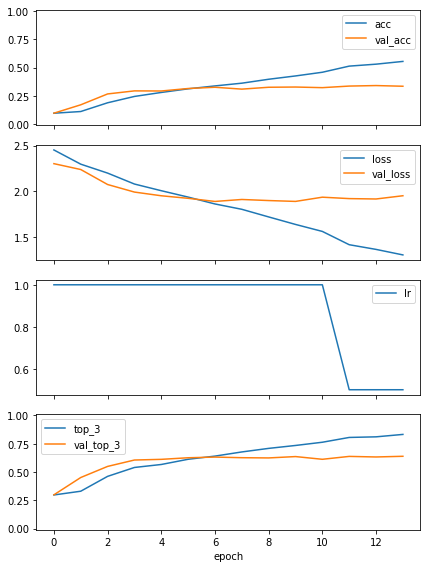

In [160]:
%%time
hist = model.fit_generator(
        train_generator,
        steps_per_epoch= 8000/32, #len(train)/batchsize
        epochs=20,
        validation_data=validation_generator,
        validation_steps=2000/ 32, #len(test)/batchsize
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.5,patience=3)], 
        class_weight=class_wt_dic)


plot_history(hist)

In [161]:
label_dict ={'Sweater': 4, 'Jacket': 6, 'Skirt': 7, \
 'Tank': 2, 'Shorts': 8, 'Blouse': 0, \
 'Cardigan': 5, 'Top': 3, 'Dress': 9, 'Tee': 1}

## Predicted Y  label

#### Model Predicted probabilities for the 10 classes  and Highest Predicted Class for each example

**Important Note:**  Make validation_generator's shuffle argument False but keep the train_generator Shuffle as false

In [166]:
%%time

predictions_class_prob= model.predict_generator(validation_generator, steps=2000/32)


CPU times: user 4.42 s, sys: 284 ms, total: 4.7 s
Wall time: 4.61 s


In [167]:
print('Probabilities for each class:\n')
predictions_class_prob

Probabilities for each class:



array([[ 0.0945117 ,  0.08412936,  0.10227276, ...,  0.0820784 ,
         0.08432321,  0.08907079],
       [ 0.02186547,  0.02756197,  0.02467675, ...,  0.02792079,
         0.06083515,  0.00611896],
       [ 0.05733661,  0.17976139,  0.23220201, ...,  0.02583267,
         0.04637503,  0.03337602],
       ..., 
       [ 0.00545234,  0.01102121,  0.00277103, ...,  0.37120017,
         0.4793984 ,  0.05451253],
       [ 0.05993206,  0.21499798,  0.09242877, ...,  0.01440982,
         0.01205969,  0.41517249],
       [ 0.16140465,  0.06606103,  0.44336712, ...,  0.00616393,
         0.00613122,  0.00814115]], dtype=float32)

In [200]:
predictions_class_prob[2]

array([ 0.05733661,  0.17976139,  0.23220201,  0.19208379,  0.1238395 ,
        0.04182593,  0.06736705,  0.02583267,  0.04637503,  0.03337602], dtype=float32)

In [190]:
# Class with highest predicted probability for each example
y_pred = np.argmax(predictions_class_prob, axis=1)

In [191]:
print('Predicted Labels:\n')
y_pred

Predicted Labels:



array([5, 4, 2, ..., 8, 9, 2])

### -----> Issue finding True y label

validation_generator.classes does print the True labels but in the order that they are retrieved from the directory, it doesn't take into account the batching or sample expansion by augmentation.
https://q-a-assistant.info/computer-internet-technology/keras-get-true-labels-y-test-from-imagedatagenerator-or-predict-generator/1165857

In [244]:
y_true = validation_generator.classes  # True Lable

In [245]:
y_true 

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [246]:
validation_generator.filenames

['Cat0/Floral_Print_Peasant_Blouse+img_00000113.jpg',
 'Cat0/Textured_High-Neck_Blouse+img_00000062.jpg',
 'Cat0/Embroidered_Mesh_Gauze_Blouse+img_00000088.jpg',
 'Cat0/Speckled_Slub_Knit_Blouse+img_00000079.jpg',
 'Cat0/Eyelash_Lace-Paneled_Blouse+img_00000060.jpg',
 'Cat0/Butterfly_Print_Blouse+img_00000057.jpg',
 'Cat0/Baroque_Print_Blouse+img_00000074.jpg',
 'Cat0/Woven_Chelsea_Collar_Blouse+img_00000087.jpg',
 'Cat0/Floral_Printed_Side-Tie_Blouse+img_00000048.jpg',
 'Cat0/Metallic_Polka_Dot_Blouse+img_00000044.jpg',
 'Cat0/Boxy_Angel-Sleeved_Blouse+img_00000069.jpg',
 'Cat0/Floral_Flutter_Sleeve_Blouse+img_00000039.jpg',
 'Cat0/Lace-Paneled_Georgette_Blouse+img_00000019.jpg',
 'Cat0/Side-Slit_Collared_Blouse+img_00000094.jpg',
 'Cat0/Collared_Surplice_Blouse+img_00000074.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_00000083.jpg',
 'Cat0/Abstract_Daisy_Print_Blouse+img_00000009.jpg',
 'Cat0/Cap-Sleeved_Lace_Blouse+img_00000068.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_000000

In [247]:
validation_generator.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [248]:
validation_generator.class_indices

{'Cat0': 0,
 'Cat1': 1,
 'Cat2': 2,
 'Cat3': 3,
 'Cat4': 4,
 'Cat5': 5,
 'Cat6': 6,
 'Cat7': 7,
 'Cat8': 8,
 'Cat9': 9}

In [249]:
import seaborn as sns

In [250]:
label_dict ={'Sweater': 4, 'Jacket': 6, 'Skirt': 7, \
 'Tank': 2, 'Shorts': 8, 'Blouse': 0, \
 'Cardigan': 5, 'Top': 3, 'Dress': 9, 'Tee': 1}

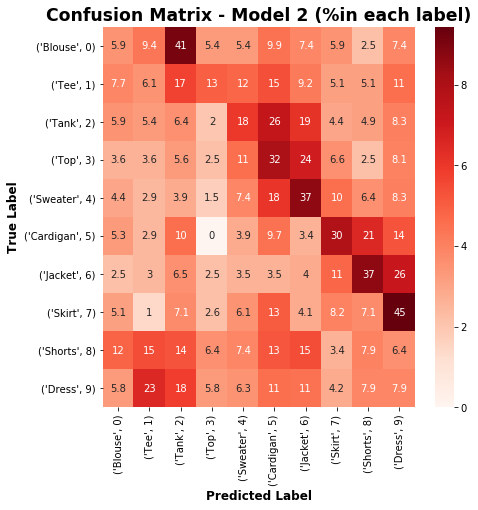

In [251]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 1 (%in each label)',y_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [252]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.066
             precision    recall  f1-score   support

          0       0.10      0.06      0.08       203
          1       0.08      0.06      0.07       196
          2       0.05      0.06      0.06       204
          3       0.06      0.03      0.04       197
          4       0.09      0.07      0.08       204
          5       0.07      0.10      0.08       206
          6       0.03      0.04      0.03       201
          7       0.09      0.08      0.08       196
          8       0.08      0.08      0.08       203
          9       0.05      0.08      0.06       190

avg / total       0.07      0.07      0.07      2000



### Shifting y_true labels by 2

In [253]:
y_new_true =[]
for i in range(len(y_true)):
    if y_true[i] <=7:
        y_new_true.append(y_true[i] +2)
    else:
        y_new_true.append(y_true[i] -8)
    

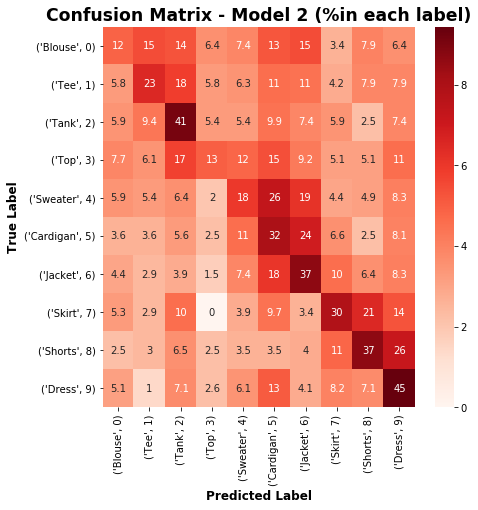

In [254]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 1 (%in each label)',y_new_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [255]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_new_true, y_pred))
print(classification_report(y_new_true, y_pred))

Accuracy: 0.288
             precision    recall  f1-score   support

          0       0.21      0.12      0.15       203
          1       0.30      0.23      0.26       190
          2       0.32      0.41      0.36       203
          3       0.30      0.13      0.18       196
          4       0.23      0.18      0.20       204
          5       0.21      0.32      0.25       197
          6       0.28      0.37      0.32       204
          7       0.34      0.30      0.32       206
          8       0.36      0.37      0.37       201
          9       0.31      0.45      0.37       196

avg / total       0.29      0.29      0.28      2000



## Model 2 
### - Pre-process  - with ZCA Whitening and Flow directly from directory
### - Architecture: 1st Sequential Model

In [256]:
import keras
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
#import vis


In [257]:
# Metrics for accuracy - sparse top 3 categorical
#Checks whether y_true matches any of the top3 predictions(Y_preds)/classes with top3 probabilites predicted by model 
#Use Y_pred with probabilitites for each class and not y_pred that gives only a single predicted class corresponding
#to class with highest probability

def top_3(y_true, Y_pred):  
    return keras.metrics.top_k_categorical_accuracy(y_true, Y_pred, k=3)

In [258]:
# plots the model's score metrics: loss and accuracy and top k accuracy

def plot_history(history): 
    measures = np.unique([m.replace('val_', '') for m in history.history.keys()])
    num_meas = len(measures)
    x = arange(len(history.history[measures[0]]))
    fix, axes = subplots(nrows=num_meas,ncols=1,squeeze=True, sharex=True,figsize=(6,2*num_meas), tight_layout=True)
    if num_meas == 1:
        axes = [axes]
    for i,meas in enumerate(measures):
        axes[i].plot(x, history.history[meas], label=meas)
        if "val_"+meas in history.history.keys():
            axes[i].plot(x, history.history["val_"+meas], label="val_"+meas)
        axes[i].legend()
        if meas in ["acc", "top_3"]:
            axes[i].set_ylim((-0.01,1.01))
    axes[-1].set_xlabel("epoch");

In [259]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 10   #see below for explanation
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [260]:
model2 = Sequential()

model2.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(200, 200,3)))
convout1 = Activation('relu')
model2.add(convout1)
model2.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model2.add(convout2)
model2.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy', top_3])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_17 (Activation)   (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_18 (Activation)   (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 307328)            0         
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(200, 200,...)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


### Balancing Class Weights

Adding class_weight to model.fit():  
dictionary mapping classes to a weight value, used for scaling the loss function (during training only)
  
Formula for class weights:  
n_samples / (n_classes * np.bincount(y))  

e.g. classes & sample sizes  = {1: 20, 2: 40, 3:30, 4:10}    
For class 1     
n_samples / (n_classes * np.bincount(y))    
n_samples = 20 +40+30+10 =100      
n_classes = 4  
np.bincount(y) = 20  
class wt. = 100 /(4*20) = 1.25  

  
Hence, class wt. dictionary would be:  
class_weight = {1: 1.25, 2: .625, 3:.83, 4:2.5}   
So for class 4, the no. of samples drawn from the class would be up-sampled to 2.5 times the samples in class 4
and for class 2 it would be downsampled to .625 the no. of samples in class 2 

In [261]:
n_samples =len(train)
n_samples

8000

In [262]:
n_classes = 10 # No. of classes/labels

In [263]:
from collections import Counter

In [264]:
Counter(train.label_i) # this takes the labels as 1 to 9 but our model takes Y_train which has labels from 0 to 8
#hence subtracting 1 from the y_train in the counter keys below

Counter({0: 811,
         1: 783,
         2: 818,
         3: 787,
         4: 815,
         5: 826,
         6: 804,
         7: 786,
         8: 813,
         9: 757})

In [265]:
label_sample_dic = Counter(train.label_i)
label_sample_dic

Counter({0: 811,
         1: 783,
         2: 818,
         3: 787,
         4: 815,
         5: 826,
         6: 804,
         7: 786,
         8: 813,
         9: 757})

n_samples / (n_classes * np.bincount(y))  
n_samples = 20 +40+30+10 =100  
n_classes = 4  
np.bincount(y) = 20  
class wt. = 100 /(420) = 1.25

## Athough Y_train are double the no. of y_train the class weights should work as each example of y_train is present twice in a flipped form. So multiplying each class sample by 2 and  the overall n_samples(8000*2) by 2 would lead to the same class weights

In [266]:
class_wt_dic = {}
print('Sample Class Distribution:\n', label_sample_dic)

for i in label_sample_dic:
    class_wt_dic[i] = n_samples / (n_classes * label_sample_dic[i])

print('\nClass Weights Dictionary:\n',class_wt_dic)   

Sample Class Distribution:
 Counter({5: 826, 2: 818, 4: 815, 8: 813, 0: 811, 6: 804, 3: 787, 7: 786, 1: 783, 9: 757})

Class Weights Dictionary:
 {0: 0.9864364981504316, 1: 1.0217113665389528, 2: 0.9779951100244498, 3: 1.0165184243964422, 4: 0.9815950920245399, 5: 0.9685230024213075, 6: 0.9950248756218906, 7: 1.0178117048346056, 8: 0.984009840098401, 9: 1.0568031704095113}


In [267]:
def plot_confusion(title_plot,y_test, y_pred):
    
    c_mat = confusion_matrix(y_test,y_pred)
    labels = sorted(label_dict.items(),key = lambda x: x[1])# or use---> unique(y_test)
    sns.heatmap(
        sqrt(c_mat),
        annot=np.true_divide(c_mat, c_mat.sum(axis=1, keepdims=True))*100, #annotations on Plot are in % for each row
        cmap= plt.cm.Reds,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    ylabel("True Label", fontsize = 'large',fontweight ='bold' )
    xlabel("Predicted Label", fontsize = 'large',fontweight ='bold' )
    title(title_plot, fontsize = 'xx-large',fontweight ='bold' )

#### Image Preprocessing

In [268]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=False,
    zca_epsilon=1e-6,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



In [269]:
train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Train_Set',
        target_size=(200, 200), #image width & height
        batch_size=32,
        class_mode='categorical')

Found 8000 images belonging to 10 classes.


In [270]:
validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Test_Set',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',
        shuffle= False)

Found 2000 images belonging to 10 classes.


#### Final Model Execution

Epoch 1/20


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.


250/250 [==============================] - 65s - loss: 2.4115 - acc: 0.1006 - top_3: 0.2959 - val_loss: 2.2977 - val_acc: 0.1230 - val_top_3: 0.3245
Epoch 2/20
250/250 [==============================] - 64s - loss: 2.2593 - acc: 0.1450 - top_3: 0.3997 - val_loss: 2.1528 - val_acc: 0.2280 - val_top_3: 0.5085
Epoch 3/20
250/250 [==============================] - 64s - loss: 2.1421 - acc: 0.2175 - top_3: 0.5006 - val_loss: 2.0543 - val_acc: 0.2565 - val_top_3: 0.5495
Epoch 4/20
250/250 [==============================] - 64s - loss: 2.0723 - acc: 0.2535 - top_3: 0.5416 - val_loss: 1.9837 - val_acc: 0.2975 - val_top_3: 0.6015
Epoch 5/20
250/250 [==============================] - 64s - loss: 1.9945 - acc: 0.2823 - top_3: 0.5814 - val_loss: 1.9927 - val_acc: 0.2935 - val_top_3: 0.5770
Epoch 6/20
250/250 [==============================] - 64s - loss: 1.9303 - acc: 0.3120 - top_3: 0.6134 - val_loss: 1.9203 - val_acc: 0.3200 - val_top_3: 0.6240
Epoch 7/20
250/250 [==============================]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


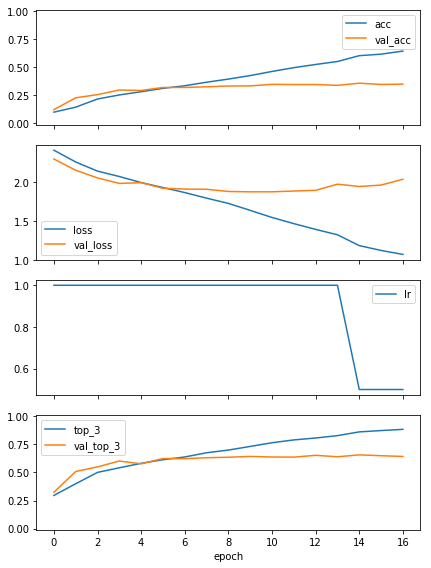

In [272]:
%%time
hist = model2.fit_generator(
        train_generator,
        steps_per_epoch=8000/32,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=2000/ 32,
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.5,patience=3)], 
        class_weight=class_wt_dic)


plot_history(hist)

In [273]:
label_dict ={'Sweater': 4, 'Jacket': 6, 'Skirt': 7, \
 'Tank': 2, 'Shorts': 8, 'Blouse': 0, \
 'Cardigan': 5, 'Top': 3, 'Dress': 9, 'Tee': 1}

## y_Pred
#### Predicted probabilities for the 10 classes for each examle


In [292]:
predictions_class_prob =model2.predict_generator(validation_generator,steps=2000/32)

In [293]:
print('Probabilities for each class:\n')
predictions_class_prob

Probabilities for each class:



array([[  2.07001697e-02,   4.84769017e-01,   1.36952437e-02, ...,
          5.53730169e-05,   1.52889217e-04,   1.14002061e-04],
       [  2.32558930e-03,   4.80573773e-02,   1.57929230e-02, ...,
          1.96949463e-06,   1.77912867e-08,   3.21423954e-08],
       [  6.44809753e-02,   7.17981279e-01,   6.44725235e-03, ...,
          6.21599174e-05,   2.31294849e-04,   7.42365664e-05],
       ..., 
       [  8.63476396e-02,   3.96867245e-02,   9.29126982e-03, ...,
          1.61341261e-02,   3.08881397e-03,   5.79403713e-03],
       [  1.19253777e-01,   9.36932191e-02,   1.06962234e-01, ...,
          1.09443609e-02,   3.72272567e-03,   2.10191216e-03],
       [  6.62361877e-03,   1.35046775e-02,   4.08853637e-04, ...,
          1.61460396e-02,   1.17941806e-02,   2.32297909e-02]], dtype=float32)

In [294]:
predictions_class_prob[2]

array([  6.44809753e-02,   7.17981279e-01,   6.44725235e-03,
         1.79259926e-01,   2.85043418e-02,   2.21015071e-03,
         7.48375489e-04,   6.21599174e-05,   2.31294849e-04,
         7.42365664e-05], dtype=float32)

In [296]:
# Class with highest predicted probability for each example
y_pred = np.argmax(predictions_class_prob, axis=1)

In [297]:
print('Predicted Labels:\n')
y_pred

Predicted Labels:



array([1, 3, 1, ..., 5, 3, 4])

### -----> Issue finding True y label

validation_generator.classes does print the True labels but in the order that they are retrieved from the directory, it doesn't take into account the batching or sample expansion by augmentation.
https://q-a-assistant.info/computer-internet-technology/keras-get-true-labels-y-test-from-imagedatagenerator-or-predict-generator/1165857

In [298]:
y_true = validation_generator.classes  # True Lable

In [299]:
y_true 

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [300]:
validation_generator.filenames

['Cat0/Floral_Print_Peasant_Blouse+img_00000113.jpg',
 'Cat0/Textured_High-Neck_Blouse+img_00000062.jpg',
 'Cat0/Embroidered_Mesh_Gauze_Blouse+img_00000088.jpg',
 'Cat0/Speckled_Slub_Knit_Blouse+img_00000079.jpg',
 'Cat0/Eyelash_Lace-Paneled_Blouse+img_00000060.jpg',
 'Cat0/Butterfly_Print_Blouse+img_00000057.jpg',
 'Cat0/Baroque_Print_Blouse+img_00000074.jpg',
 'Cat0/Woven_Chelsea_Collar_Blouse+img_00000087.jpg',
 'Cat0/Floral_Printed_Side-Tie_Blouse+img_00000048.jpg',
 'Cat0/Metallic_Polka_Dot_Blouse+img_00000044.jpg',
 'Cat0/Boxy_Angel-Sleeved_Blouse+img_00000069.jpg',
 'Cat0/Floral_Flutter_Sleeve_Blouse+img_00000039.jpg',
 'Cat0/Lace-Paneled_Georgette_Blouse+img_00000019.jpg',
 'Cat0/Side-Slit_Collared_Blouse+img_00000094.jpg',
 'Cat0/Collared_Surplice_Blouse+img_00000074.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_00000083.jpg',
 'Cat0/Abstract_Daisy_Print_Blouse+img_00000009.jpg',
 'Cat0/Cap-Sleeved_Lace_Blouse+img_00000068.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_000000

In [301]:
validation_generator.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [302]:
validation_generator.class_indices

{'Cat0': 0,
 'Cat1': 1,
 'Cat2': 2,
 'Cat3': 3,
 'Cat4': 4,
 'Cat5': 5,
 'Cat6': 6,
 'Cat7': 7,
 'Cat8': 8,
 'Cat9': 9}

In [303]:
import seaborn as sns

In [304]:
label_dict ={'Sweater': 4, 'Jacket': 6, 'Skirt': 7, \
 'Tank': 2, 'Shorts': 8, 'Blouse': 0, \
 'Cardigan': 5, 'Top': 3, 'Dress': 9, 'Tee': 1}

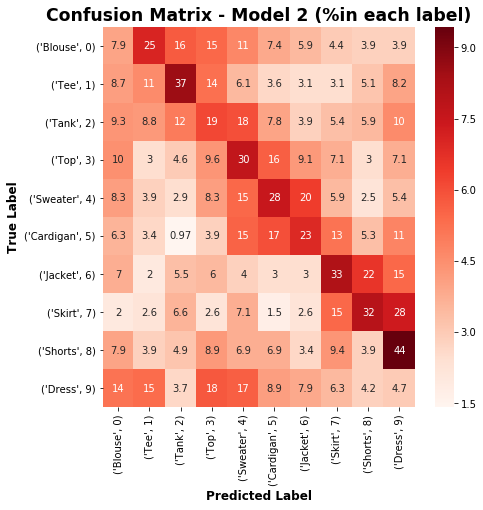

In [305]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 2 (%in each label)',y_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [306]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.100
             precision    recall  f1-score   support

          0       0.10      0.08      0.09       203
          1       0.13      0.11      0.12       196
          2       0.13      0.12      0.13       204
          3       0.09      0.10      0.09       197
          4       0.12      0.15      0.13       204
          5       0.18      0.17      0.18       206
          6       0.04      0.03      0.03       201
          7       0.15      0.15      0.15       196
          8       0.05      0.04      0.04       203
          9       0.03      0.05      0.04       190

avg / total       0.10      0.10      0.10      2000



### Shifting y_true labels by 1

In [307]:
y_new_true =[]
for i in range(len(y_true)):
    if y_true[i] <=8:
        y_new_true.append(y_true[i] +1)
    else:
        y_new_true.append(y_true[i] -9)
    

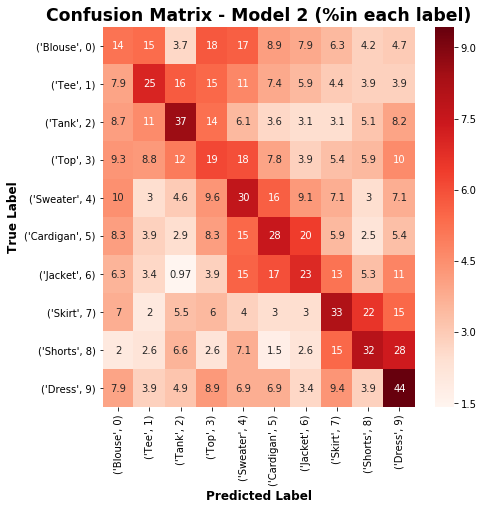

In [308]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 2 (%in each label)',y_new_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [309]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_new_true, y_pred))
print(classification_report(y_new_true, y_pred))

Accuracy: 0.285
             precision    recall  f1-score   support

          0       0.17      0.14      0.15       190
          1       0.32      0.25      0.28       203
          2       0.39      0.37      0.38       196
          3       0.18      0.19      0.18       204
          4       0.23      0.30      0.26       197
          5       0.28      0.28      0.28       204
          6       0.29      0.23      0.26       206
          7       0.32      0.33      0.32       201
          8       0.36      0.32      0.34       196
          9       0.32      0.44      0.37       203

avg / total       0.29      0.28      0.28      2000



##  Model 3
### - Architecture: 2nd Sequential Model
### - Pre-pocessing - type 2

 Note: Athough Y_train are double the no. of y_train the class weights should work as each example of y_train is present twice in a flipped form. So multiplying each class sample by 2 and  the overall n_samples(8000*2) by 2 would lead to the same class weights

In [312]:
class_wt_dic = {}
print('Sample Class Distribution:\n', label_sample_dic)

for i in label_sample_dic:
    class_wt_dic[i] = n_samples / (n_classes * label_sample_dic[i])

print('\nClass Weights Dictionary:\n',class_wt_dic)   

Sample Class Distribution:
 Counter({5: 826, 2: 818, 4: 815, 8: 813, 0: 811, 6: 804, 3: 787, 7: 786, 1: 783, 9: 757})

Class Weights Dictionary:
 {0: 0.9864364981504316, 1: 1.0217113665389528, 2: 0.9779951100244498, 3: 1.0165184243964422, 4: 0.9815950920245399, 5: 0.9685230024213075, 6: 0.9950248756218906, 7: 1.0178117048346056, 8: 0.984009840098401, 9: 1.0568031704095113}


In [313]:
label_dict ={'Sweater': 4, 'Jacket': 6, 'Skirt': 7, \
 'Tank': 2, 'Shorts': 8, 'Blouse': 0, \
 'Cardigan': 5, 'Top': 3, 'Dress': 9, 'Tee': 1}

In [338]:
def top_3(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

def plot_history(history):

    measures = np.unique([m.replace('val_', '') for m in history.history.keys()])
    num_meas = len(measures)
    x = arange(len(history.history[measures[0]]))
    fix, axes = subplots(nrows=num_meas,ncols=1,squeeze=True, sharex=True,figsize=(6,2*num_meas), tight_layout=True)
    if num_meas == 1:
        axes = [axes]
    for i,meas in enumerate(measures):
        if meas == "lr":
            continue
        axes[i].plot(x, history.history[meas], label=meas)
        if "val_"+meas in history.history.keys():
            axes[i].plot(x, history.history["val_"+meas], label="val_"+meas)
        axes[i].legend()
        if meas in ["acc", "top_3"]:
            axes[i].set_ylim((-0.01,1.01))
    axes[-1].set_xlabel("epoch");

#### Image Preprocessing

In [397]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-6,
    horizontal_flip=True,
    rotation_range=15,  
    width_shift_range=4/200,
    height_shift_range=4/200,
    fill_mode='constant',
    cval=0.,
    data_format=K.image_data_format()
    )

test_datagen = ImageDataGenerator(rescale=1./255)

In [398]:
train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Train_Set',
        target_size=(200, 200), #image width & height
        batch_size=32,
        class_mode='categorical')

Found 8000 images belonging to 10 classes.


In [399]:
validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Test_Set',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',
        shuffle= False)

Found 2000 images belonging to 10 classes.


#### Model Architecture 3

In [318]:
from keras.layers.normalization import BatchNormalization

In [319]:
dropout_prob = .4
model3 = Sequential()

model3.add(Convolution2D(64, (2, 2), activation='elu', padding="same",input_shape=(200, 200,3)))
   
    
model3.add(MaxPooling2D(
        pool_size=(2, 2), strides=(2, 2), padding="same"))   
    
model3.add(BatchNormalization())    
   
model3.add(Dropout(dropout_prob))

model3.add(Convolution2D(64, (2, 2), activation='elu', padding="same"))
   
model3.add(MaxPooling2D(
        pool_size=(2, 2), strides=(2, 2), padding="same"))    
    
model3.add(BatchNormalization())
model3.add(Dropout(.7* dropout_prob))    
    
model3.add(Convolution2D(64, (2, 2), activation='elu', padding="same"))
   
model3.add(MaxPooling2D(
        pool_size=(2, 2), strides=(2, 2), padding="same"))    
    
model3.add(BatchNormalization())    
model3.add(Flatten())
   
model3.add(Dropout(.5* dropout_prob))        
model3.add(Dense(200, activation="elu"))
model3.add(Dropout(dropout_prob))
model3.add(Dense(nb_classes, activation="softmax"))

In [320]:
nb_classes

10

In [322]:
epochs = 50
batch_size = 100

model3.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Nadam(lr=0.005),
        metrics=['accuracy', top_3])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 200, 200, 64)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 64)      16448     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 50, 64)        256       
__________

#### Final Model Execution

Epoch 1/20


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:524: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.


250/250 [==============================] - 63s - loss: 14.2915 - acc: 0.1100 - top_3: 0.9656 - val_loss: 14.3175 - val_acc: 0.1110 - val_top_3: 0.9945
Epoch 2/20
250/250 [==============================] - 61s - loss: 14.5117 - acc: 0.1015 - top_3: 0.9988 - val_loss: 14.3918 - val_acc: 0.1070 - val_top_3: 0.9995
Epoch 3/20
250/250 [==============================] - 61s - loss: 14.5185 - acc: 0.1013 - top_3: 0.9981 - val_loss: 14.3921 - val_acc: 0.1065 - val_top_3: 0.9990
Epoch 4/20
250/250 [==============================] - 61s - loss: 14.3678 - acc: 0.1097 - top_3: 0.9979 - val_loss: 14.4176 - val_acc: 0.1055 - val_top_3: 1.0000
Epoch 5/20
250/250 [==============================] - 61s - loss: 14.4983 - acc: 0.1017 - top_3: 0.9998 - val_loss: 14.4902 - val_acc: 0.1010 - val_top_3: 1.0000
Epoch 6/20
250/250 [==============================] - 61s - loss: 14.5183 - acc: 0.1009 - top_3: 1.0000 - val_loss: 14.4902 - val_acc: 0.1010 - val_top_3: 1.0000
Epoch 7/20
250/250 [===================

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


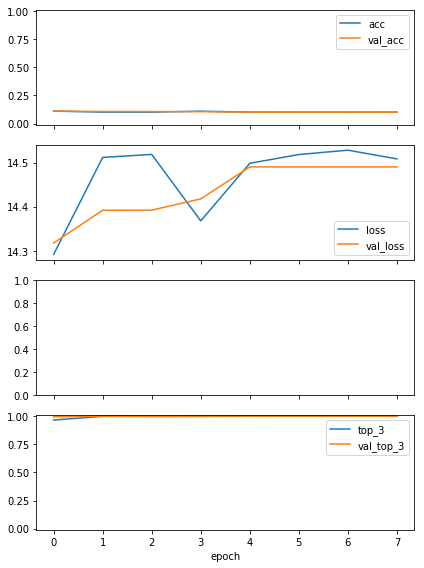

In [323]:
%%time
hist = model3.fit_generator(
        train_generator,
        steps_per_epoch=8000/32,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=2000/ 32,
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.5,patience=3)], 
        class_weight=class_wt_dic)


plot_history(hist)

##  Model 4
### - Architecture: 1st Sequential Model
### - Pre-pocessing - type 2


In [370]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 10   #see below for explanation
# number of epochs to train
nb_epoch = 80

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [371]:
model4 = Sequential()

model4.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(200, 200,3)))
convout1 = Activation('relu')
model4.add(convout1)
model4.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model4.add(convout2)
model4.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(nb_classes))
model4.add(Activation('softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy', top_3])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
activation_49 (Activation)   (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_50 (Activation)   (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 307328)            0         
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(200, 200,...)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


Epoch 1/100


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:524: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.


250/250 [==============================] - 65s - loss: 2.4249 - acc: 0.1049 - top_3: 0.3035 - val_loss: 2.2995 - val_acc: 0.1080 - val_top_3: 0.3155
Epoch 2/100
250/250 [==============================] - 64s - loss: 2.2675 - acc: 0.1385 - top_3: 0.3795 - val_loss: 2.1942 - val_acc: 0.1950 - val_top_3: 0.4995
Epoch 3/100
250/250 [==============================] - 64s - loss: 2.1833 - acc: 0.1938 - top_3: 0.4736 - val_loss: 2.0681 - val_acc: 0.2660 - val_top_3: 0.5675
Epoch 4/100
250/250 [==============================] - 64s - loss: 2.1226 - acc: 0.2289 - top_3: 0.5144 - val_loss: 2.0421 - val_acc: 0.2550 - val_top_3: 0.5590
Epoch 5/100
250/250 [==============================] - 64s - loss: 2.0891 - acc: 0.2390 - top_3: 0.5310 - val_loss: 2.0165 - val_acc: 0.2880 - val_top_3: 0.5860
Epoch 6/100
250/250 [==============================] - 64s - loss: 2.0582 - acc: 0.2607 - top_3: 0.5497 - val_loss: 1.9736 - val_acc: 0.2925 - val_top_3: 0.5900
Epoch 7/100
250/250 [=========================

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


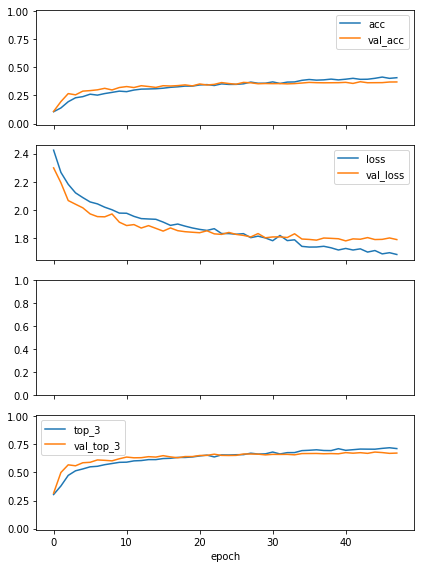

In [372]:
%%time

#old model with less layers architecture..running throuh extra preprocessing steps from directory-- loss starts at 2
hist = model4.fit_generator(
        train_generator,
        steps_per_epoch=8000/32,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=2000/ 32,
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.5,patience=3)])


plot_history(hist)

## y_Pred
#### Predicted probabilities for the 10 classes for each examle


In [373]:
predictions_class_prob4 =model4.predict_generator(validation_generator,steps=2000/32)

In [374]:
# Class with highest predicted probability for each example
y_pred = np.argmax(predictions_class_prob4, axis=1)

In [375]:
print('Predicted Labels:\n')
y_pred

Predicted Labels:



array([6, 9, 4, ..., 4, 6, 4])

In [376]:
y_true = validation_generator.classes  # True Lable

In [377]:
y_true 

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [378]:
validation_generator.filenames

['Cat0/Floral_Print_Peasant_Blouse+img_00000113.jpg',
 'Cat0/Textured_High-Neck_Blouse+img_00000062.jpg',
 'Cat0/Embroidered_Mesh_Gauze_Blouse+img_00000088.jpg',
 'Cat0/Speckled_Slub_Knit_Blouse+img_00000079.jpg',
 'Cat0/Eyelash_Lace-Paneled_Blouse+img_00000060.jpg',
 'Cat0/Butterfly_Print_Blouse+img_00000057.jpg',
 'Cat0/Baroque_Print_Blouse+img_00000074.jpg',
 'Cat0/Woven_Chelsea_Collar_Blouse+img_00000087.jpg',
 'Cat0/Floral_Printed_Side-Tie_Blouse+img_00000048.jpg',
 'Cat0/Metallic_Polka_Dot_Blouse+img_00000044.jpg',
 'Cat0/Boxy_Angel-Sleeved_Blouse+img_00000069.jpg',
 'Cat0/Floral_Flutter_Sleeve_Blouse+img_00000039.jpg',
 'Cat0/Lace-Paneled_Georgette_Blouse+img_00000019.jpg',
 'Cat0/Side-Slit_Collared_Blouse+img_00000094.jpg',
 'Cat0/Collared_Surplice_Blouse+img_00000074.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_00000083.jpg',
 'Cat0/Abstract_Daisy_Print_Blouse+img_00000009.jpg',
 'Cat0/Cap-Sleeved_Lace_Blouse+img_00000068.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_000000

In [379]:
validation_generator.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [380]:
validation_generator.class_indices

{'Cat0': 0,
 'Cat1': 1,
 'Cat2': 2,
 'Cat3': 3,
 'Cat4': 4,
 'Cat5': 5,
 'Cat6': 6,
 'Cat7': 7,
 'Cat8': 8,
 'Cat9': 9}

In [381]:
import seaborn as sns

In [382]:
label_dict ={'Sweater': 4, 'Jacket': 6, 'Skirt': 7, \
 'Tank': 2, 'Shorts': 8, 'Blouse': 0, \
 'Cardigan': 5, 'Top': 3, 'Dress': 9, 'Tee': 1}

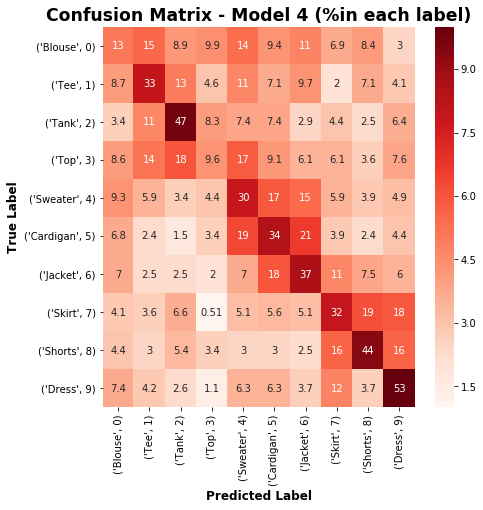

In [383]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 4 (%in each label)',y_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [384]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.332
             precision    recall  f1-score   support

          0       0.18      0.13      0.15       203
          1       0.34      0.33      0.33       196
          2       0.44      0.47      0.45       204
          3       0.20      0.10      0.13       197
          4       0.25      0.30      0.28       204
          5       0.30      0.34      0.32       206
          6       0.32      0.37      0.34       201
          7       0.32      0.32      0.32       196
          8       0.43      0.44      0.44       203
          9       0.42      0.53      0.47       190

avg / total       0.32      0.33      0.32      2000



### Saving Model
save a Keras model into a single HDF5 file which will contain:   
the architecture of the model, allowing to re-create the model  
the weights of the model  
the training configuration (loss, optimizer)  
the state of the optimizer, allowing to resume training exactly where you left off.  


In [387]:
from keras.models import load_model

model4.save('/home/ubuntu/data/model4.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model4 = load_model('/home/ubuntu/data/model4.h5')

ValueError: Unknown metric function:top_3